# Problem Statement - To Prepare a prediction model for Price

1. Consider only below columns
2. Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

#### We found that CC and Doors were inversely related with strength of 88%
#### Calculated VIF for both and deleted CC with high VIF
#### Checked for outliers and deleted 3 outliers from dataset
#### Predicted price based on this model with rsquared value of 86%

In [79]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
#from sklearn.linear_model import LinearRegression

In [80]:
ds = pd.read_csv('ToyotaCorolla.csv' ,encoding ='unicode_escape')
ds

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [81]:
ds.shape

(1436, 38)

In [82]:
car_ds = pd.DataFrame(ds, columns=["Age_08_04", "KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"])
print(car_ds.head())
car_ds.shape

   Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight  Price
0         23  46986  90  2000      3      5            210    1165  13500
1         23  72937  90  2000      3      5            210    1165  13750
2         24  41711  90  2000      3      5            210    1165  13950
3         26  48000  90  2000      3      5            210    1165  14950
4         30  38500  90  2000      3      5            210    1170  13750


(1436, 9)

In [83]:
car_ds.rename(columns= {'Age_08_04':'age_months'},inplace=True)
car_ds

,age_months,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


### Exploratory Data Analysis - EDA

In [84]:
car_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age_months     1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [85]:
car_ds.describe()

,age_months,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


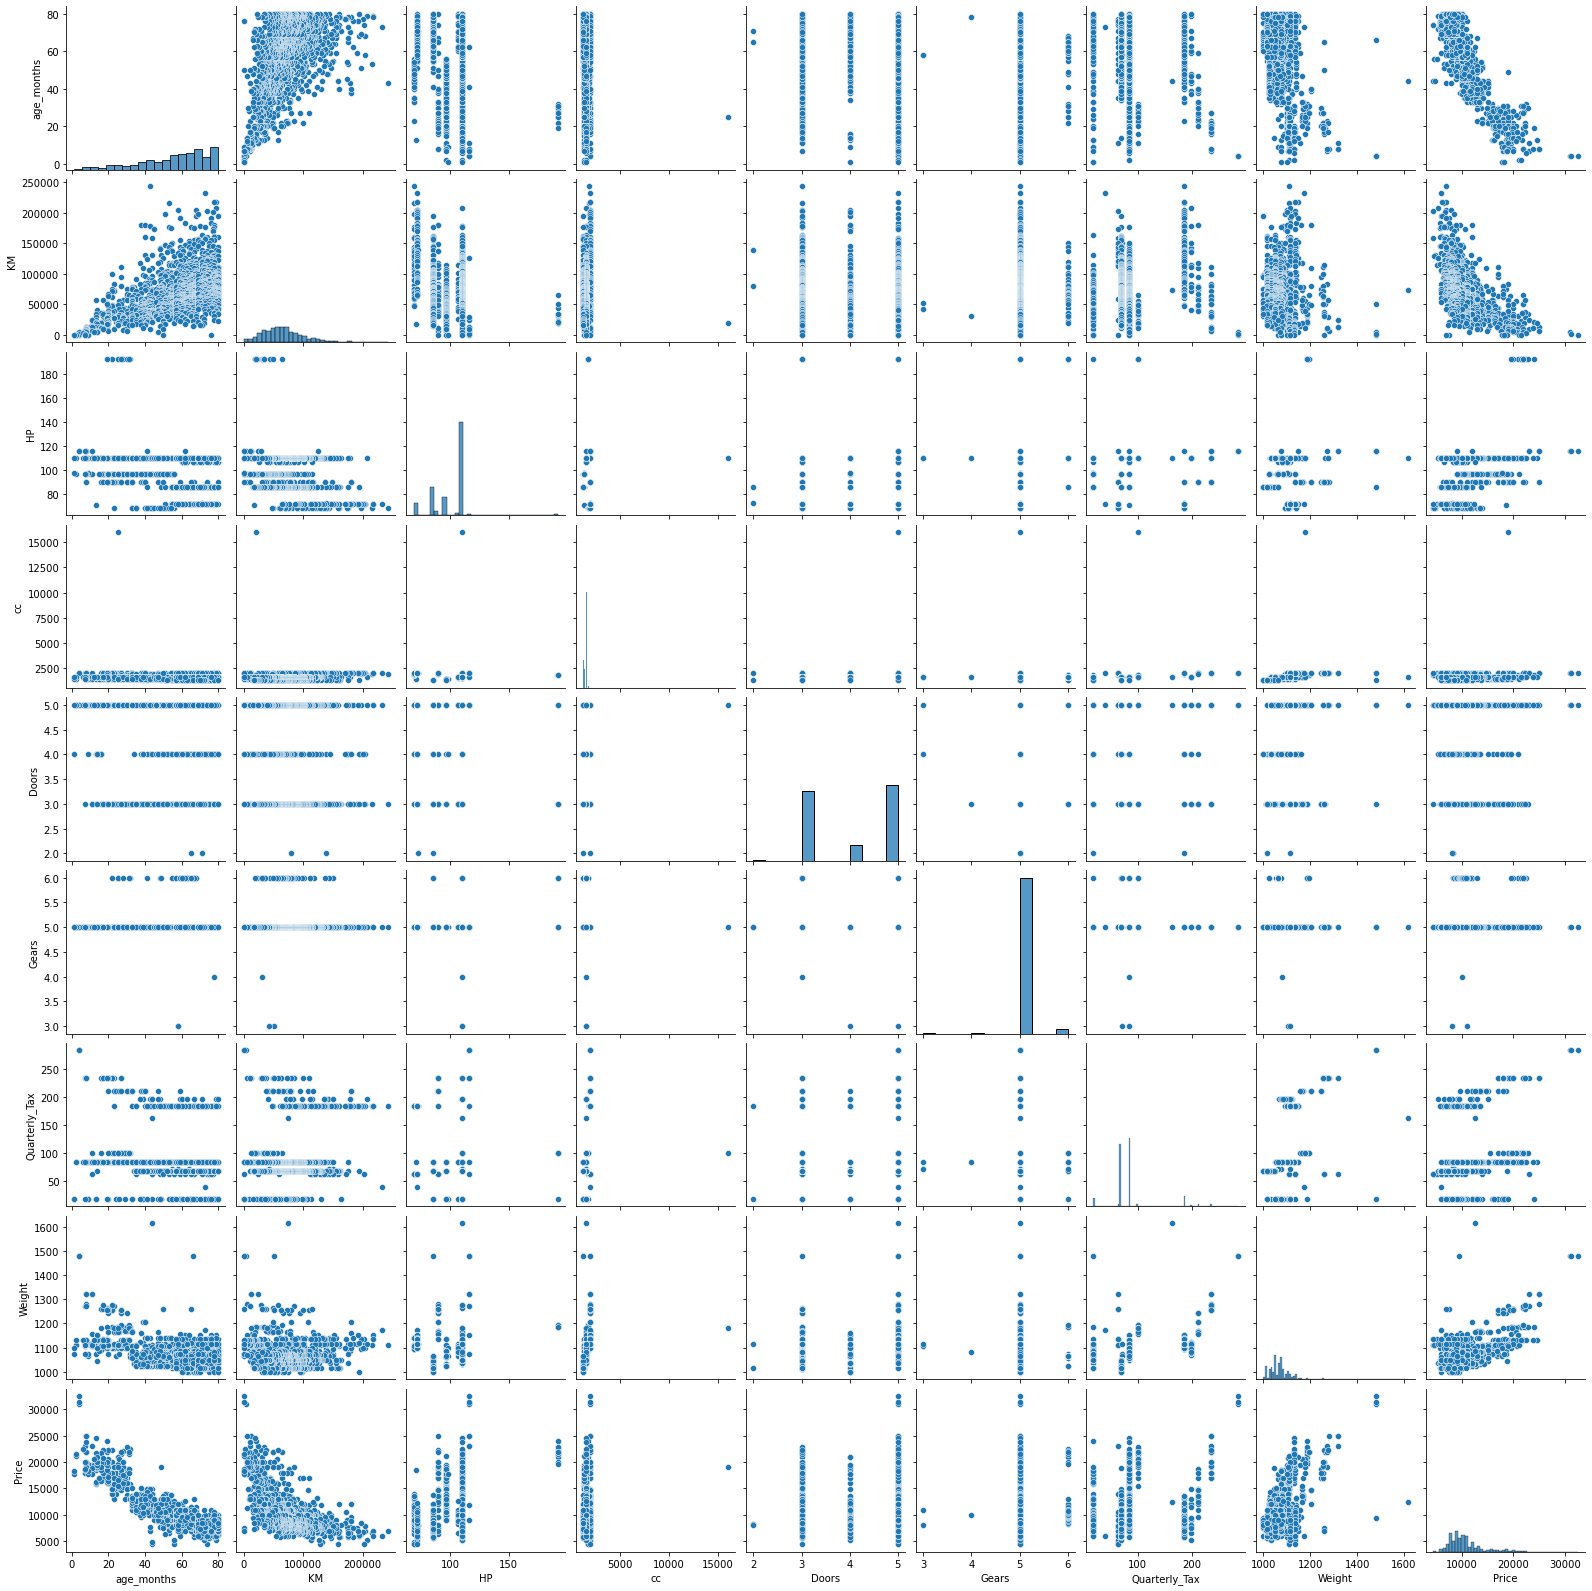

In [16]:
sns.pairplot(car_ds)

In [31]:
car_ds.corr()

# only price and age_months are having strength of 87% (inversely related)
# all other variables are independent of each other

,age_months,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
age_months,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


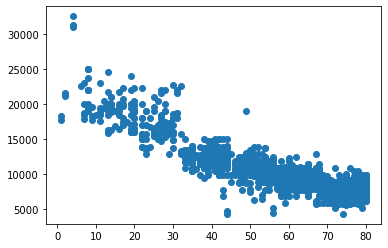

In [25]:
# checking scatter plot for 2 variables at a time
plt.scatter('age_months','Price', data=car_ds)

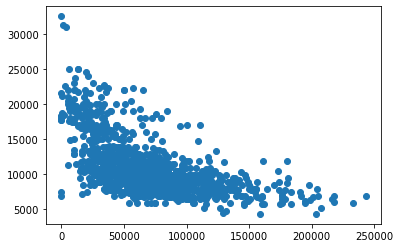

In [24]:
plt.scatter('KM','Price', data=car_ds)

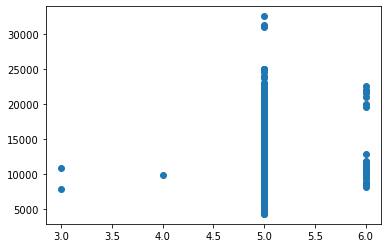

In [26]:
plt.scatter('Gears','Price', data=car_ds)

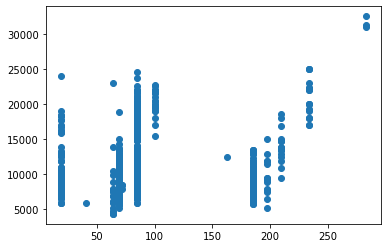

In [27]:
plt.scatter('Quarterly_Tax','Price', data=car_ds)

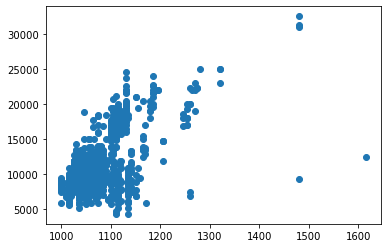

In [30]:
plt.scatter(car_ds.Weight,car_ds.Price)

<AxesSubplot:>

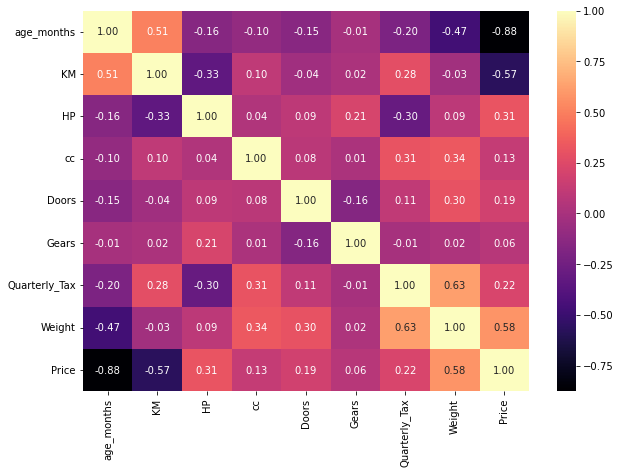

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(car_ds.corr(), cmap='magma', annot=True, fmt=".2f")

# from heatmap darker shade ie price and age_months are showing multicollinearity

{'whiskers': [<matplotlib.lines.Line2D at 0x241f87d0b80>,
 'caps': [<matplotlib.lines.Line2D at 0x241f8c53850>,
 'boxes': [<matplotlib.lines.Line2D at 0x241f9d60430>],
 'medians': [<matplotlib.lines.Line2D at 0x241f8c632b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x241f8b5daf0>],
 'means': []}

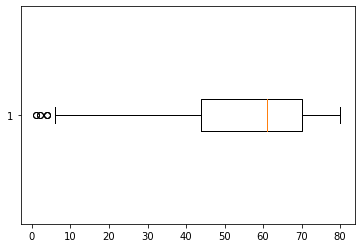

In [41]:
plt.boxplot(car_ds.age_months, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x241f9efe9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x241f9f031c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x241f9efe880>],
 'medians': [<matplotlib.lines.Line2D at 0x241f9f03730>],
 'fliers': [<matplotlib.lines.Line2D at 0x241f9f03550>],
 'means': []}

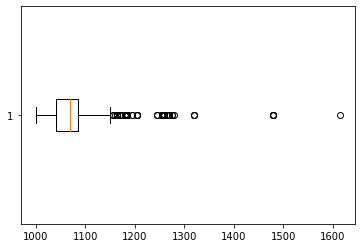

In [48]:
plt.boxplot(car_ds.Weight, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x241f9e5b400>,
 'caps': [<matplotlib.lines.Line2D at 0x241f9e73760>,
 'boxes': [<matplotlib.lines.Line2D at 0x241f9e5b7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x241f9e7b820>],
 'fliers': [<matplotlib.lines.Line2D at 0x241f9e7bdf0>],
 'means': []}

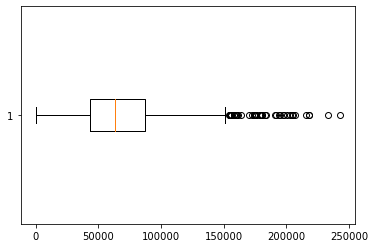

In [47]:
plt.boxplot(car_ds.KM, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x241f9d9c9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x241f9e2a790>,
 'boxes': [<matplotlib.lines.Line2D at 0x241f9d9c8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x241f9d95bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x241f9d95e50>],
 'means': []}

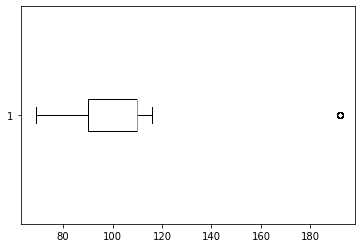

In [46]:
plt.boxplot(car_ds.HP, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x241f9e0bfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x241f9da9460>,
 'boxes': [<matplotlib.lines.Line2D at 0x241f9e0bc70>],
 'medians': [<matplotlib.lines.Line2D at 0x241f9da95e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x241f9e08460>],
 'means': []}

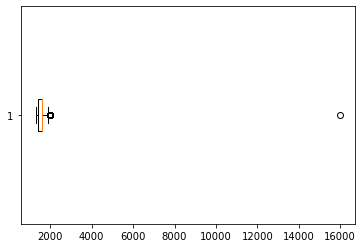

In [45]:
plt.boxplot(car_ds.cc, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x241f8c5a130>,
 'caps': [<matplotlib.lines.Line2D at 0x241f9dae940>,
 'boxes': [<matplotlib.lines.Line2D at 0x241f8ad1b20>],
 'medians': [<matplotlib.lines.Line2D at 0x241f9dae820>],
 'fliers': [<matplotlib.lines.Line2D at 0x241f9daec70>],
 'means': []}

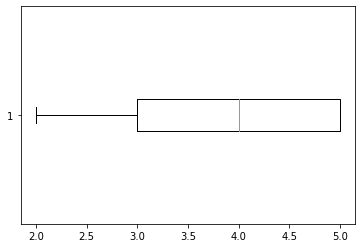

In [44]:
plt.boxplot(car_ds.Doors, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x241f9c69730>,
 'caps': [<matplotlib.lines.Line2D at 0x241f8acfaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x241fbd211c0>],
 'medians': [<matplotlib.lines.Line2D at 0x241f8acfb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x241f893c070>],
 'means': []}

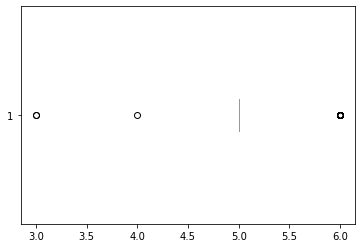

In [43]:
plt.boxplot(car_ds.Gears, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x241f9fa0100>,
 'caps': [<matplotlib.lines.Line2D at 0x241f9fdcd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x241f9fbb370>],
 'medians': [<matplotlib.lines.Line2D at 0x241f9fdcbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x241f9f9bf10>],
 'means': []}

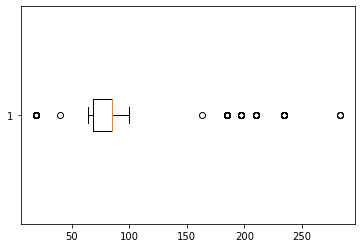

In [42]:
plt.boxplot(car_ds.Quarterly_Tax, vert=False)

### Model Building

#### Using stats model

In [86]:
model = smf.ols('Price~age_months+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=car_ds).fit()
model.params

Intercept       -5573.106358
age_months       -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        12:37:30   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age_months     -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
model.pvalues
# pvalues of all variables is < 0.05
# for cc and doors pvalues > 0.05 ie these 2 variables are insignificant

Intercept         8.241949e-05
age_months       3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

#### Since pvalues of cc & door variables are insignificant 
therefore checking them separately

In [89]:
model_cc = smf.ols('Price~cc', data=car_ds).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Wed, 04 May 2022   Prob (F-statistic):           1.55e-06
Time:                        12:37:35   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
model_cc.pvalues

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

In [91]:
model_doors = smf.ols('Price~Doors', data=car_ds).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 04 May 2022   Prob (F-statistic):           1.46e-12
Time:                        12:37:38   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model_doors.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [93]:
#checking cc and doors together
model_cc_doors = smf.ols('Price~cc+Doors', data=car_ds).fit()
model_cc_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Wed, 04 May 2022   Prob (F-statistic):           1.15e-15
Time:                        12:37:43   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Now cc and doors when taken along with other variables are becoming insignificant
#### But when checked separately or together, then they r significant
#### So, need to check VIF for each variable, higher the VIF - exclude that variable from the dataset

### Calculating VIF

#### higher VIF -  exclude that variable from equation

In [94]:
rsq_cc = smf.ols('cc~age_months+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data=car_ds).fit().rsquared
vif_cc = 1/(1-rsq_cc)
vif_cc

1.1638939849423795

In [95]:
rsq_doors = smf.ols('Doors~age_months+KM+HP+cc+Gears+Quarterly_Tax+Weight', data=car_ds).fit().rsquared
vif_doors = 1/(1-rsq_doors)
vif_doors

#here VIF of CC is higher - we can drop doors column from dataset

1.156575207076043

### Model Validation

#### QQ plot (quantile - quantile plot)

Text(0.5, 1.0, 'Normal qq plot')

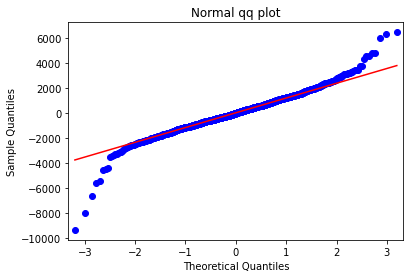

In [130]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal qq plot')

# dots which r not on the line are outliers

#### Residual plot - Fitted(predicted) vs Residuals

In [131]:
def get_standardized_value(vals):
    return ((vals - vals.mean())/vals.std())

Text(0, 0.5, 'Standardized Resid values')

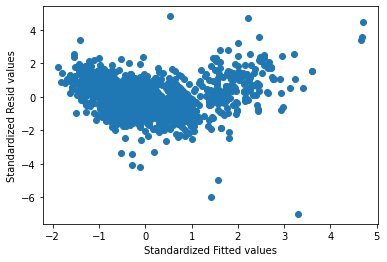

In [133]:
plt.scatter(get_standardized_value(model.fittedvalues), get_standardized_value(model.resid))
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Resid values')

#shoudl have no pattern
# residual mean should be around zero

### Model Deletion Diagnostics -- Deleting outliers

#### 1. Cooks Distance

In [96]:
# cooks_distance function returns cooks values and probability distribution values
# so dash indicates ignore prob. dist. values
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

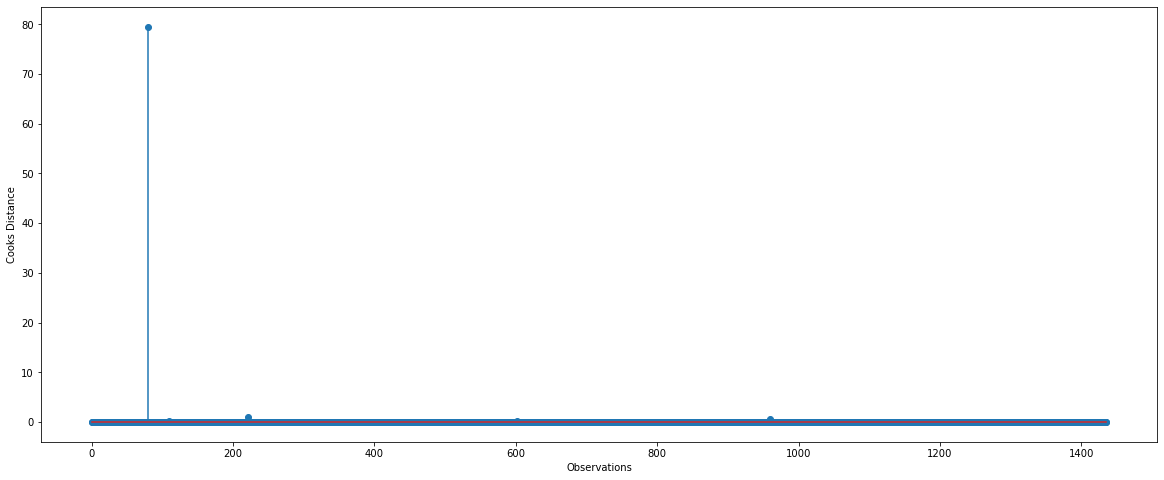

In [97]:
# len(ds) -- no. of observations
# plot influencers using stem plot
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(ds)), np.round(c,3))
plt.xlabel('Observations')
plt.ylabel('Cooks Distance')
plt.show()

In [98]:
# index and value of influencer where c is more than 1
# here the 80th observation is an outlier having cooks distance > 1 ie. 79.52
(np.argmax(c), np.max(c))

(80, 79.52010624139577)

#### Using High Influence points

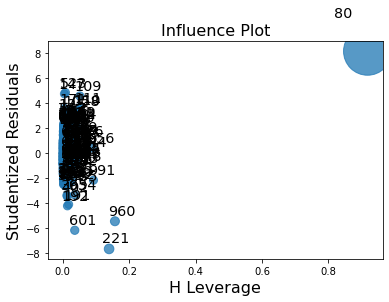

In [99]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [69]:
ds.shape

(1436, 38)

In [100]:
# calculating leverage cutoff value for determing outliers
# those observations > leverage cutoff  are outliers
k = ds.shape[1]
n = ds.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

# here the leverage cut off value is 0.08
# only 80th observation > 0.08

0.08147632311977715

#### From both cooks distance and high influence points, only 80th observation appears to be an outlier
#### so deleting 80th observation from dataset
#### before deletion, need to compare the outlier value with other values of the dataset

In [101]:
#outlier value
car_ds[car_ds.index.isin([80])]

,age_months,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
80,25,20019,110,16000,5,5,100,1180,18950


In [102]:
car_ds.head(10)

,age_months,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
5,32,61000,90,2000,3,5,210,1170,12950
6,27,94612,90,2000,3,5,210,1245,16900
7,30,75889,90,2000,3,5,210,1245,18600
8,27,19700,192,1800,3,5,100,1185,21500
9,23,71138,69,1900,3,5,185,1105,12950


#### After comparing the values, it is evident that the value of cc=16000 is clearly an outlier 
#### also cc for other values is around 2000, evident from the boxplot of cc
#### Therefore, deleting 80th observation

In [103]:
car_ds.shape

(1436, 9)

In [104]:
# loading the data in a new variable
car_ds1 = car_ds.copy()
car_ds1.head(4)

,age_months,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950


In [75]:
car_ds_firstdel = car_ds1.drop(car_ds1.index[80], axis=0).reset_index(drop=True)
car_ds_firstdel

,index,age_months,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0,23,46986,90,2000,3,5,210,1165,13500
1,1,23,72937,90,2000,3,5,210,1165,13750
2,2,24,41711,90,2000,3,5,210,1165,13950
3,3,26,48000,90,2000,3,5,210,1165,14950
4,4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...,...
1430,1431,69,20544,86,1300,3,5,69,1025,7500
1431,1432,72,19000,86,1300,3,5,69,1015,10845
1432,1433,71,17016,86,1300,3,5,69,1015,8500
1433,1434,70,16916,86,1300,3,5,69,1015,7250


In [105]:
#car_ds_firstdel.iloc[75:90]
car_ds_firstdel.shape

(1435, 10)

### Build Model -- dropping CC variable and an outlier

In [107]:
model_firstdel = smf.ols('Price~age_months+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data=car_ds_firstdel).fit()
model_firstdel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1286.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        12:40:40   Log-Likelihood:                -12368.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5434.8906   1410.637     -3.853      0.000   -8202.036   -2667.745
age_months     -121.6865      2.616    -46.512      0.000    -126.819    -116.554
KM               -0.0209      0.001    -16.737      0.000      -0.023      -0.018
HP               31.3562      2.807     11.170      0.000      25.850      36.863
Doors            -1.0602     40.013     -0.026      0.979     -79.551      77.430
Gears           598.5410    197.089      3.037      0.002     211.925     985.157
Quarterly_Tax     3.7658      1.301      2.894      0.004       1.214       6.318
Weight           16.6824      1.056     15.802      0.000      14.612      18.753
==============================================================================
Omnibus:                      146.861   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.897
Skew:                          -0.200   Prob(JB):                    3.64e-209
Kurtosis:                       6.987   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### After building model with 1435 obervations and an outlier deleted, Again checking for outliers

In [111]:
# again checking for outliers
model_influence_cc = model_firstdel.get_influence()
(c_cc,_) = model_influence_cc.cooks_distance

Text(0, 0.5, 'Cooks distance')

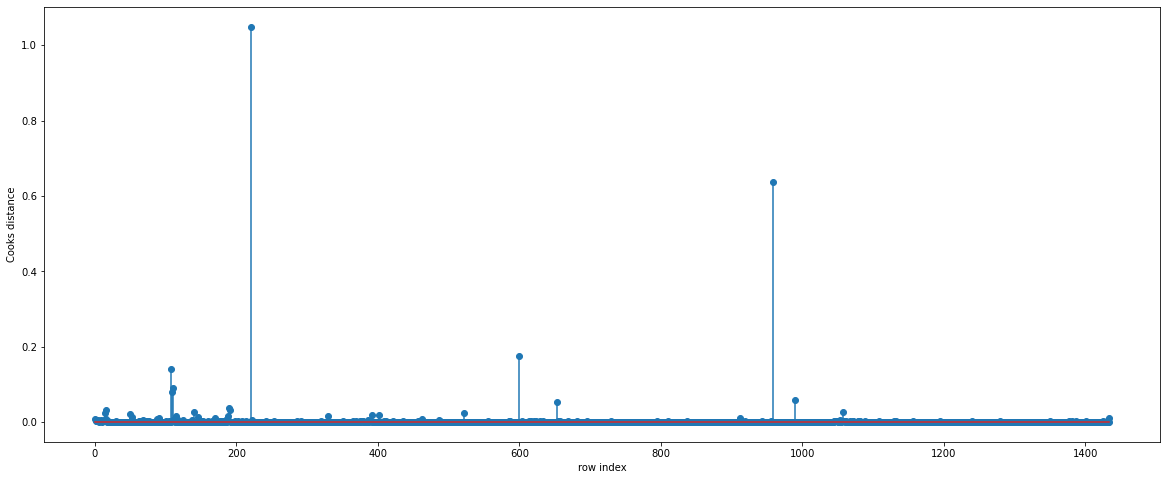

In [112]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(car_ds_firstdel)),np.round(c_cc,3))
plt.xlabel('row index')
plt.ylabel('Cooks distance')

In [113]:
# index and value of influencer where c is more than 1
# here the 80th observation is an outlier having cooks distance > 1 ie. 79.52
(np.argmax(c_cc), np.max(c_cc))

(220, 1.0492259521312157)

#### Deleting 2nd outlier at index 220

In [114]:
car_ds_seconddel = car_ds_firstdel.drop(car_ds_firstdel.index[220], axis=0).reset_index(drop=True)
car_ds_seconddel

,index,age_months,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0,23,46986,90,2000,3,5,210,1165,13500
1,1,23,72937,90,2000,3,5,210,1165,13750
2,2,24,41711,90,2000,3,5,210,1165,13950
3,3,26,48000,90,2000,3,5,210,1165,14950
4,4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...,...
1429,1431,69,20544,86,1300,3,5,69,1025,7500
1430,1432,72,19000,86,1300,3,5,69,1015,10845
1431,1433,71,17016,86,1300,3,5,69,1015,8500
1432,1434,70,16916,86,1300,3,5,69,1015,7250


In [115]:
car_ds_seconddel.shape

(1434, 10)

### Building model after deleting 2nd outlier

In [116]:
model_seconddel = smf.ols('Price~age_months+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data=car_ds_seconddel).fit()
model_seconddel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1344.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        12:50:27   Log-Likelihood:                -12332.
No. Observations:                1434   AIC:                         2.468e+04
Df Residuals:                    1426   BIC:                         2.472e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8286.2257   1435.255     -5.773      0.000   -1.11e+04   -5470.788
age_months     -118.9830      2.592    -45.902      0.000    -124.068    -113.898
KM               -0.0211      0.001    -17.214      0.000      -0.024      -0.019
HP               29.6703      2.763     10.737      0.000      24.250      35.091
Doors           -24.7651     39.386     -0.629      0.530    -102.026      52.495
Gears           584.2356    193.385      3.021      0.003     204.885     963.586
Quarterly_Tax     1.8570      1.302      1.427      0.154      -0.696       4.410
Weight           19.6904      1.111     17.729      0.000      17.512      21.869
==============================================================================
Omnibus:                      132.471   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.887
Skew:                          -0.201   Prob(JB):                    3.97e-163
Kurtosis:                       6.515   Cond. No.                     3.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The Rsquared value increased to 86% after deleting 2nd outlier
#### Again checking for outliers

In [117]:
# again checking for outliers
model_influence_cc_1 = model_seconddel.get_influence()
(c_cc_1,_) = model_influence_cc_1.cooks_distance

Text(0, 0.5, 'Cooks distance')

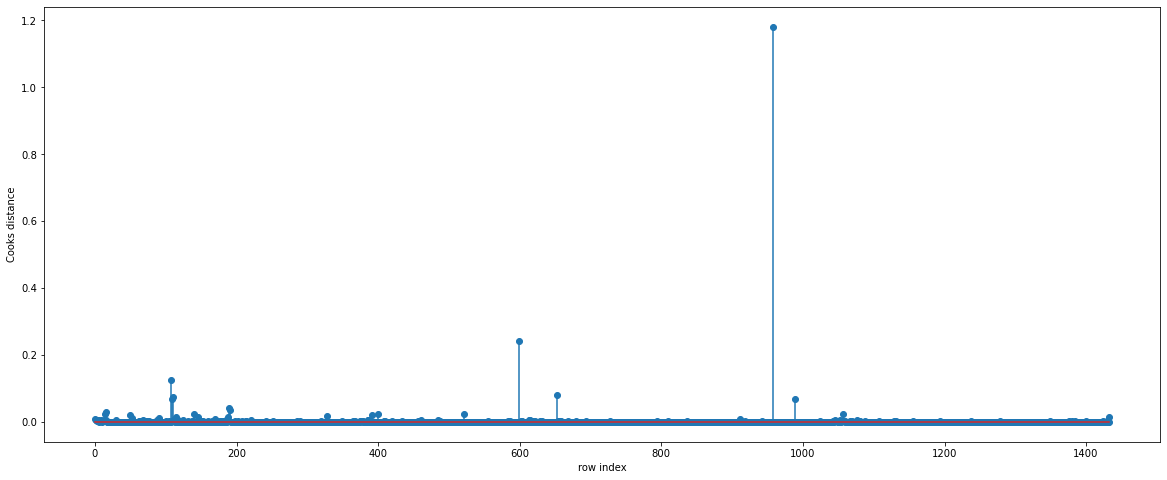

In [119]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(car_ds_seconddel)),np.round(c_cc_1,3))
plt.xlabel('row index')
plt.ylabel('Cooks distance')

In [120]:
# index and value of influencer where c is more than 1
# here the 958th observation is an outlier having cooks distance > 1 
(np.argmax(c_cc_1), np.max(c_cc_1))

(958, 1.1814594040883752)

#### Deleting the 3rd outlier at index 958

In [121]:
car_ds_thirddel = car_ds_seconddel.drop(car_ds_seconddel.index[220], axis=0).reset_index(drop=True)
car_ds_thirddel.head(4)

,index,age_months,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0,23,46986,90,2000,3,5,210,1165,13500
1,1,23,72937,90,2000,3,5,210,1165,13750
2,2,24,41711,90,2000,3,5,210,1165,13950
3,3,26,48000,90,2000,3,5,210,1165,14950


In [122]:
car_ds_thirddel.shape

(1433, 10)

### Again building model after deleting 3rd outlier at index 958

In [123]:
model_thirddel = smf.ols('Price~age_months+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data=car_ds_thirddel).fit()
model_thirddel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1343.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        12:57:05   Log-Likelihood:                -12324.
No. Observations:                1433   AIC:                         2.466e+04
Df Residuals:                    1425   BIC:                         2.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8271.5774   1435.729     -5.761      0.000   -1.11e+04   -5455.208
age_months     -119.0400      2.594    -45.888      0.000    -124.129    -113.951
KM               -0.0211      0.001    -17.189      0.000      -0.023      -0.019
HP               29.7023      2.764     10.744      0.000      24.279      35.125
Doors           -24.0945     39.408     -0.611      0.541    -101.398      53.209
Gears           583.8100    193.426      3.018      0.003     204.379     963.241
Quarterly_Tax     1.8599      1.302      1.429      0.153      -0.694       4.414
Weight           19.6752      1.111     17.708      0.000      17.496      21.855
==============================================================================
Omnibus:                      132.194   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              744.309
Skew:                          -0.201   Prob(JB):                    2.37e-162
Kurtosis:                       6.508   Cond. No.                     3.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Since the model's accuracy is not increasing - we will stop here and will use this model for prediction

### Predicting Final Price Data - after deleting cc variable and 3 outliers

In [128]:
pred_price = model_thirddel.predict(car_ds_thirddel)
pred_price.head(4)

0    16831.623218
1    16284.254539
2    16823.845561
3    16453.115447
dtype: float64

In [129]:
car_ds_thirddel['Predicted Price'] = pred_price
car_ds_thirddel.head(10)

,index,age_months,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price,Predicted Price
0,0,23,46986,90,2000,3,5,210,1165,13500,16831.623218
1,1,23,72937,90,2000,3,5,210,1165,13750,16284.254539
2,2,24,41711,90,2000,3,5,210,1165,13950,16823.845561
3,3,26,48000,90,2000,3,5,210,1165,14950,16453.115447
4,4,30,38500,90,2000,3,5,210,1170,13750,16275.709080
5,5,32,61000,90,2000,3,5,210,1170,12950,15563.050191
6,6,27,94612,90,2000,3,5,210,1245,16900,16924.933079
7,7,30,75889,90,2000,3,5,210,1245,18600,16962.725860
8,8,27,19700,192,1800,3,5,100,1185,21500,20149.532255
9,9,23,71138,69,1900,3,5,185,1105,12950,14471.441642
